<a href="https://colab.research.google.com/github/L-Shyamal/ear-echo/blob/main/Ear_Echo/Ear_Echo(17_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [7]:
#reading data from the stored CSV file
TF_data = pd.read_csv('/content/drive/MyDrive/SMU project/17-23/TF_Data0013.csv')
TF_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,-1.937074,-2.610175,-2.035095,-1.795107,-1.797393,-1.693791,-1.820345,-1.699853,-1.697886,-1.420433,...,0.906644,0.776189,0.791808,0.822683,0.743397,0.821423,0.491150,0.636196,0.543504,0.0
1,-1.499047,-1.879422,-1.817403,-1.786134,-1.980916,-1.901357,-1.691711,-2.030598,-1.803166,-1.753221,...,1.178107,1.200929,1.133334,1.040442,0.938721,0.697364,0.798673,0.879681,0.821797,1.0
2,0.790008,0.434060,0.712982,0.812824,0.666315,0.654422,0.849751,0.654235,0.857379,0.885280,...,0.921735,0.955513,1.037940,0.744337,0.978178,0.680564,0.674558,0.736127,0.654261,2.0
3,0.321399,0.258152,0.295559,0.298586,0.316088,0.324552,0.453665,0.487441,0.362400,0.302655,...,1.273357,1.235527,1.318216,1.283047,1.110610,1.027038,0.922225,1.015304,0.764112,3.0
4,-2.864369,-3.624766,-2.633100,-2.708935,-2.664836,-2.494706,-2.776803,-2.800158,-2.438698,-2.418102,...,1.058857,1.020074,1.031637,0.946086,0.890710,0.812322,1.041996,0.882235,0.681894,4.0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Seperating Data and Labels

#print(TF_data['720'].value_counts())

TF_data.drop(TF_data[TF_data['1440'] >= 5].index, inplace = True)
print(TF_data['1440'].value_counts())

# Seperating Data and Labels

X = TF_data.drop(columns='1440',axis=1)
Y = TF_data['1440']

# X_after_test , Y_after_test = X.iloc[228:] , Y.iloc[228:]
# X , Y = X.iloc[:228] , Y.iloc[:228]
# Train and Test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.22 ,stratify=Y, random_state=0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_after_test = X_after_test.astype('float32')

print("# of training data =",X_train.shape[0])
print("# of testdata =",X_test.shape[0])


0.0    46
1.0    46
2.0    46
3.0    46
4.0    46
Name: 1440, dtype: int64
# of training data = 179
# of testdata = 51


## Task List

Here the following facial expressions will be represented as given below .<br><br>
1  = No Action <br>
2  = Mouth Opened <br>
3  = Pull the lips conner Left<br>
4  = Pull the lips conner Right<br>
5  = Eye Brows Up <br>

In [16]:
task_list = ['No Action','Mouth Opened','Pull the lips conner Left','Pull the lips conner Right','Eye Brows Up']

In [9]:
#tf.keras.layers.LeakyReLU(alpha=0.01)

model = Sequential()
model.add(tf.keras.layers.Dense(720*2, activation= tf.keras.layers.LeakyReLU(alpha=0.02), input_shape=(720*2,)))
model.add(tf.keras.layers.Dense(250, activation= tf.keras.layers.LeakyReLU(alpha=0.02)))
model.add(tf.keras.layers.Dense(120, activation= 'relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))


print(model.summary())

print("Training Run")
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0008, momentum=0.08)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=8000, batch_size=32,validation_data=(X_test, Y_test))


print("\n"*5)
print("Test Run")

loss, acc = model.evaluate(X_test,Y_test)
print("Test Loss:", loss)
print("Accuracy = ", (acc * 100.0), "%")


Streaming output truncated to the last 5000 lines.
Epoch 5506/8000
6/6 [==============================] - 0s 19ms/step - loss: 7.3956e-04 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9412
Epoch 5507/8000
6/6 [==============================] - 0s 18ms/step - loss: 7.3898e-04 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9412
Epoch 5508/8000
6/6 [==============================] - 0s 20ms/step - loss: 7.3920e-04 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9412
Epoch 5509/8000
6/6 [==============================] - 0s 18ms/step - loss: 7.3849e-04 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9412
Epoch 5510/8000
6/6 [==============================] - 0s 21ms/step - loss: 7.3861e-04 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9412
Epoch 5511/8000
6/6 [==============================] - 0s 22ms/step - loss: 7.3805e-04 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9412
Epoch 5512/8000
6/6 [==============================] - 0s 20m

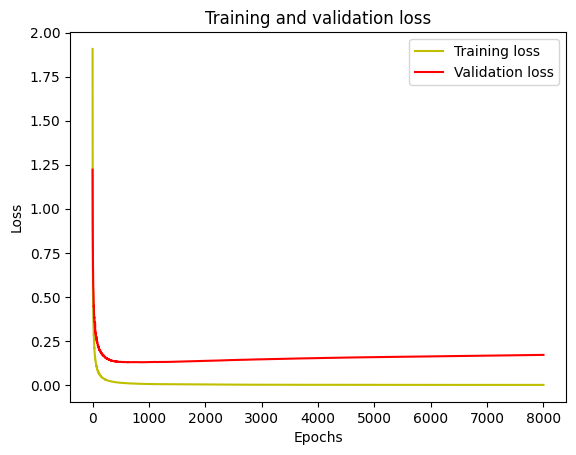

In [10]:
#plot the training and validation accuracy and loss at each epoch
plt.fi
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

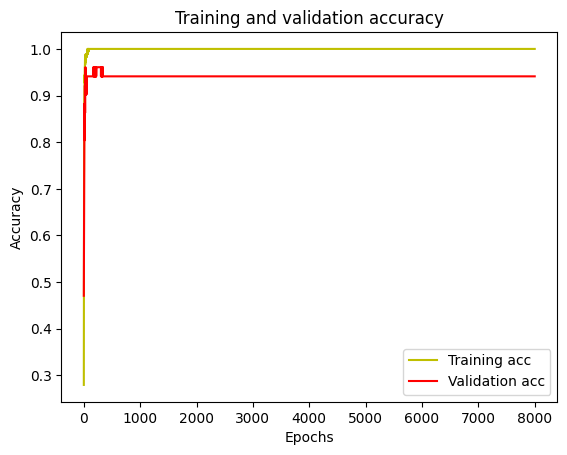

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
Y_predict = model.predict(X_test)
#print(len(Y_test) , len(Y_predict))
print ("Test Label--------------Predicted LAbel---------------")
for i in range(len(Y_predict)):
    p = np.argmax(Y_predict,axis= 1)[i]
    t = Y_test.iloc[i]
    print(t,"                        ",p,"            ",(int(t)==p))

2/2 [==============================] - 0s 3ms/step
Test Label--------------Predicted LAbel---------------
3.0                          3              True
1.0                          1              True
2.0                          2              True
2.0                          2              True
0.0                          0              True
3.0                          3              True
1.0                          1              True
2.0                          2              True
0.0                          0              True
4.0                          4              True
4.0                          4              True
2.0                          1              False
4.0                          0              False
3.0                          3              True
3.0                          3              True
2.0                          2              True
2.0                          2              True
1.0                          1              True
4.0       

In [13]:
Y_prediction = np.argmax(Y_predict,axis= 1).astype('float32')

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_prediction)

0.9411764705882353

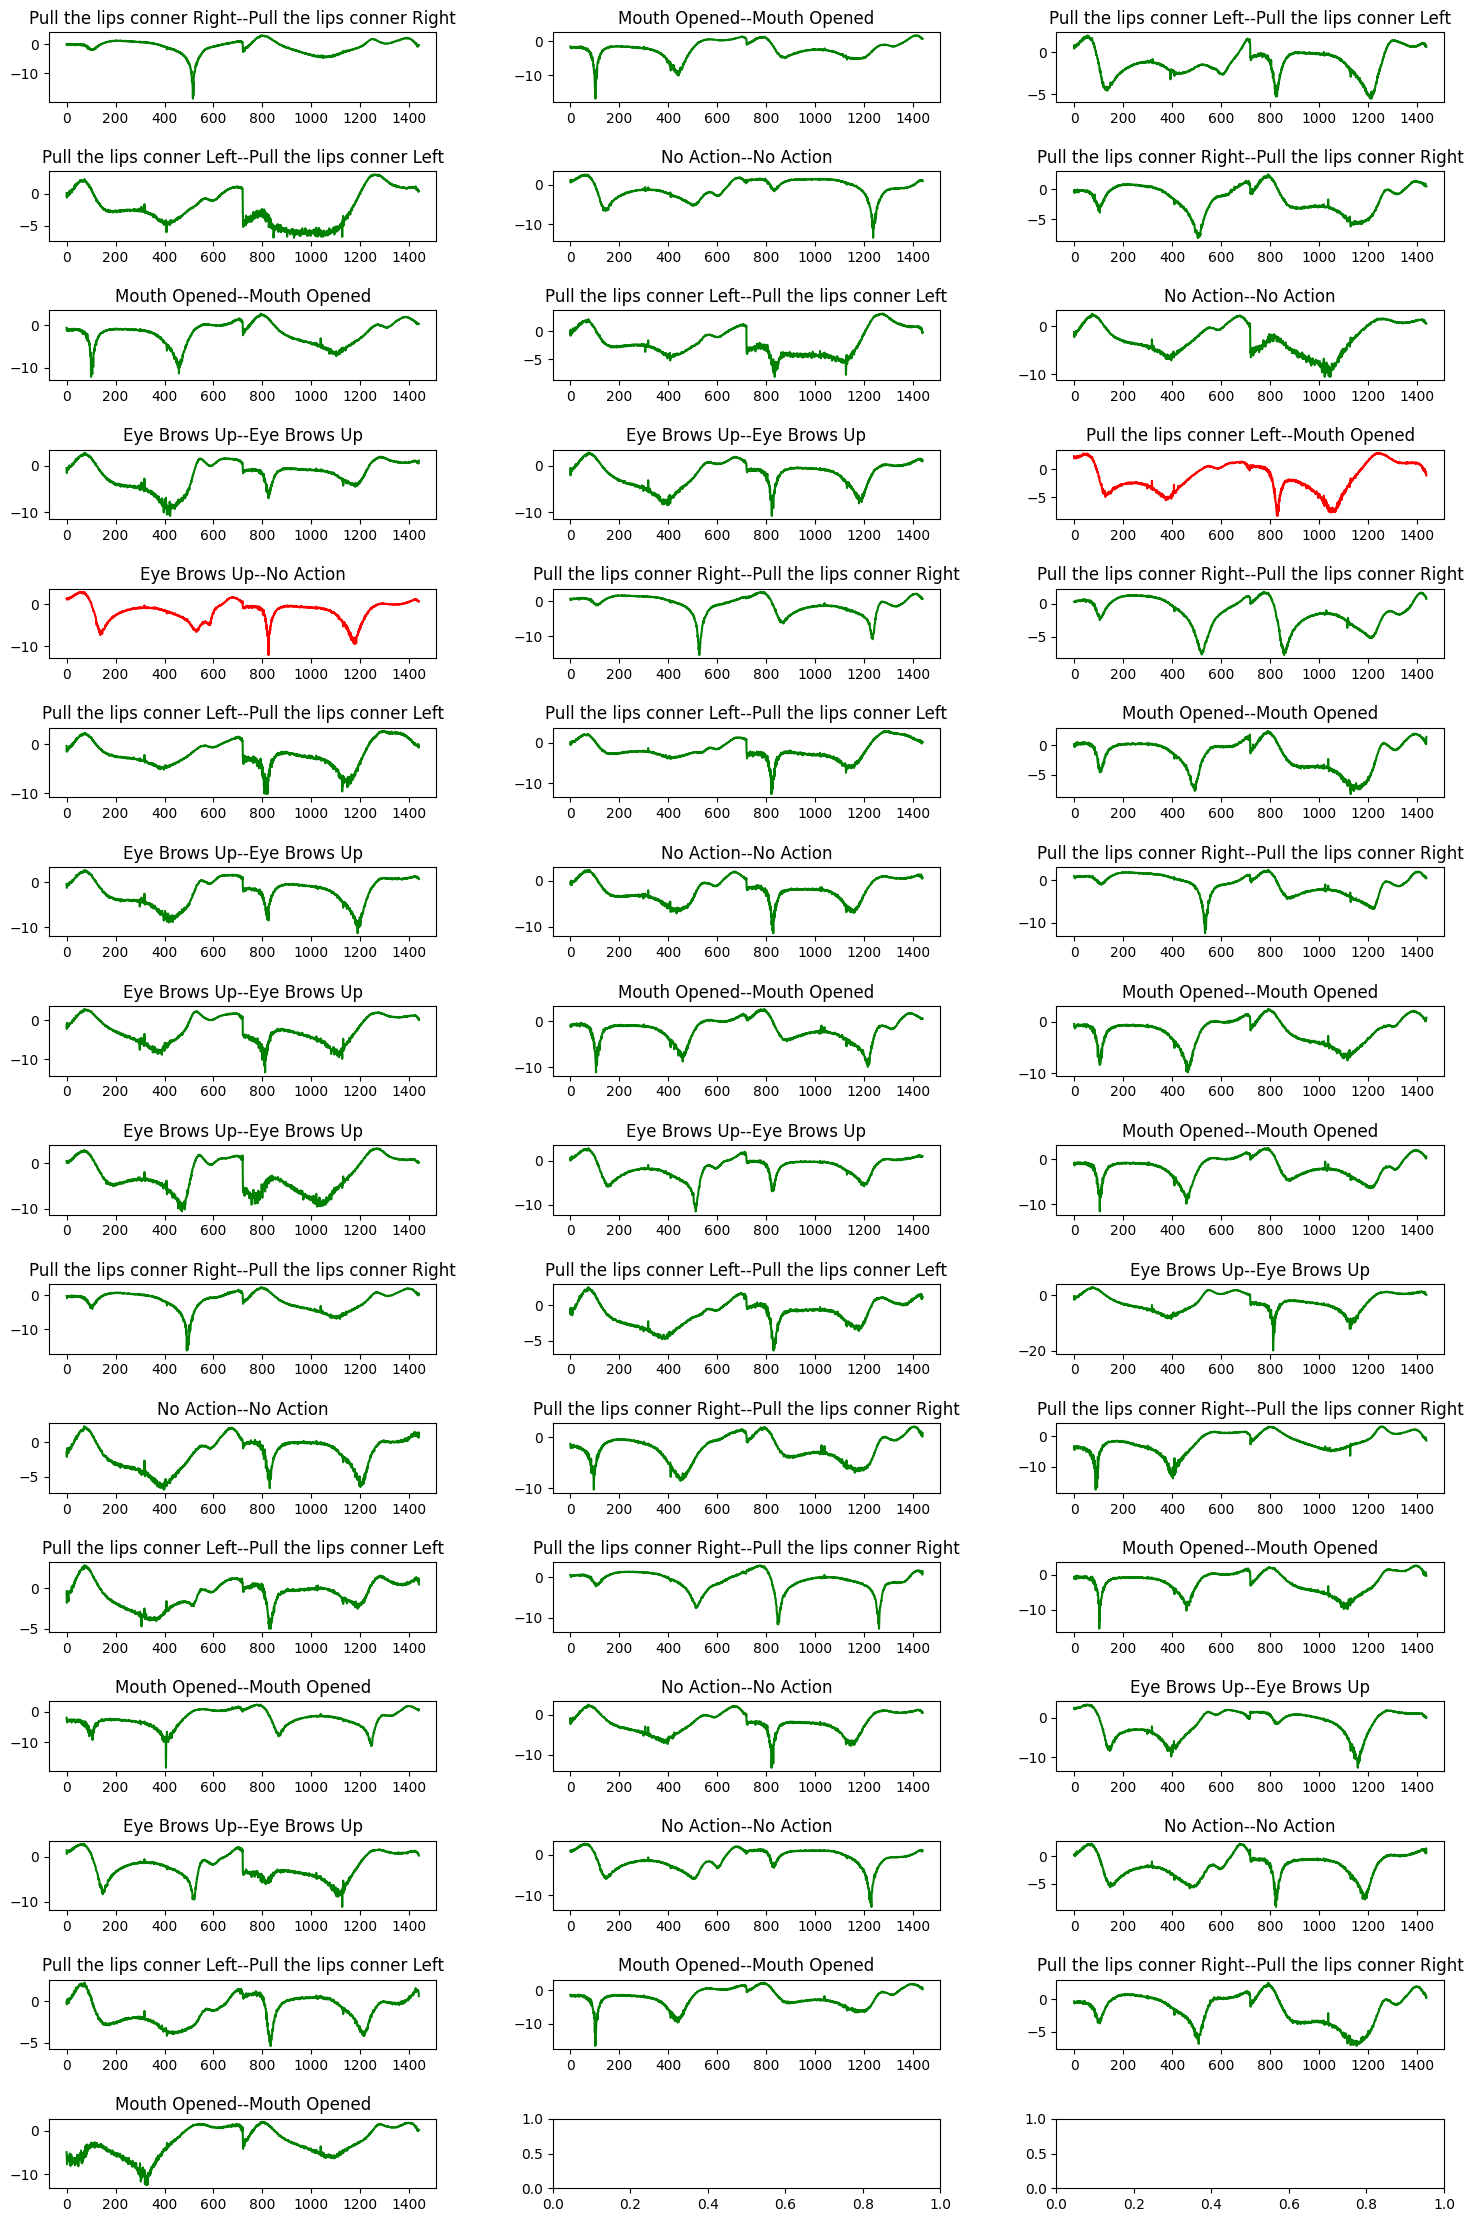

In [17]:
f = np.arange(720*2)
fig, axs = plt.subplots(16,3, figsize=(18, 28))
fig.subplots_adjust(hspace = 1, wspace=0.3)

axs = axs.ravel()

for i in range(46):

    test_name = task_list[int(Y_test.iloc[i])]
    predict_name = task_list[(np.argmax(Y_predict,axis= 1)[i])]

    if test_name==predict_name:col = 'green'
    else: col = 'red'
    axs[i].plot(f,X_test.iloc[i],color=col)
    axs[i].set_title(test_name + "--"+predict_name)

Confusion Matrix

<Axes: >

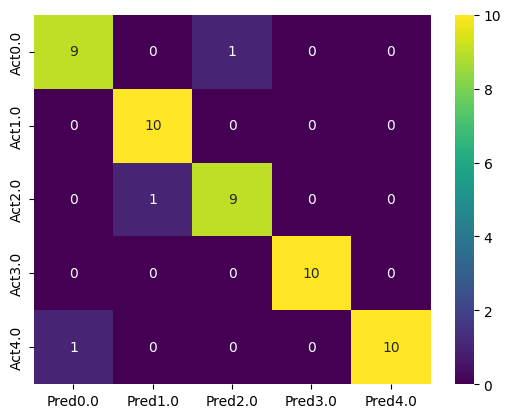

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn


def plot_ConfM(ytest,ypredict):
  labels = unique_labels(Y_test)
  col = [f'Pred{lab}' for lab in labels]
  row = [f'Act{lab}' for lab in labels]

  table = pd.DataFrame(confusion_matrix(ytest,ypredict) , columns=col , index=row)

  return seaborn.heatmap(table , annot=True, fmt ='d' , cmap='viridis')

plot_ConfM(Y_test,Y_prediction)

In [14]:
#model.save('/content/drive/MyDrive/Ear Echo/TF model-NewTaskList')

1/1 [==============================] - 0s 24ms/step - loss: 9.8431e-04 - accuracy: 1.0000


(0.0, 1.1)

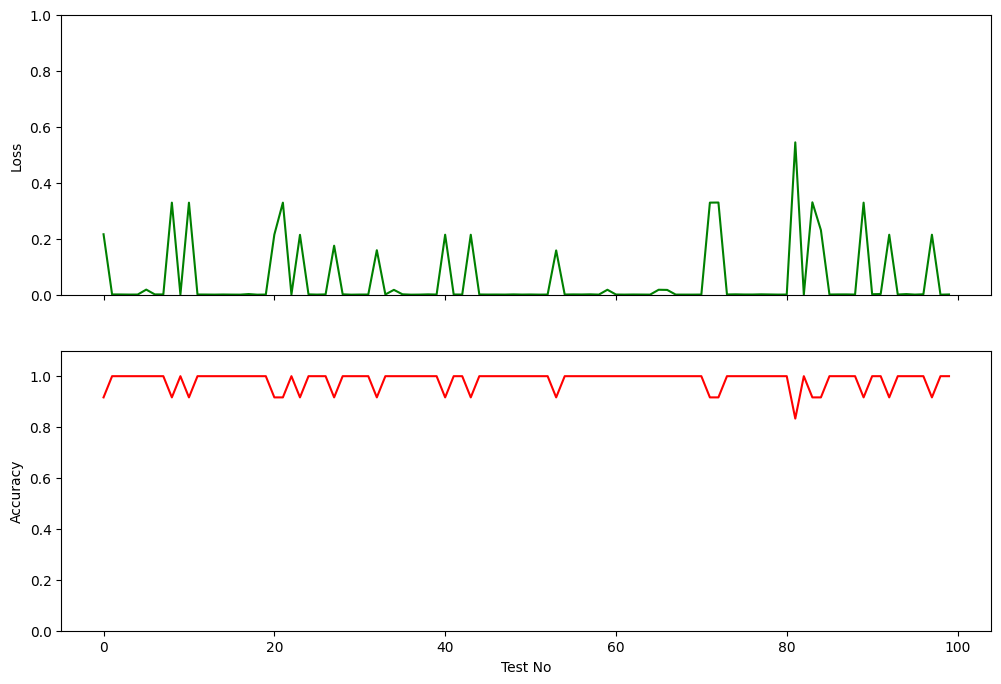

In [19]:
TestSet = []
for t in range(100):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.05 ,stratify=Y, random_state=t)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  loss, accuracy = model.evaluate(X_test,Y_test)
  TestSet.append((t,loss,accuracy))


res = np.array(TestSet).T
fig, axs = plt.subplots(2, 1,figsize=(12,8), sharex=True)

axs[0].plot(res[0],res[1],color='green')
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0,1)

axs[1].plot(res[0],res[2],color='red')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Test No")
axs[1].set_ylim(0,1.1)